In [1]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
time_resolution = '2week'

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+time_resolution+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
mix_path = './network_data'+time_resolution+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+time_resolution+".csv")
df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+time_resolution+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps_series"+time_resolution+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

In [3]:
len(df_tech_overlaps)

12

In [4]:
df_tech_overlaps

,Etch,Impala,Shindig,Droids,Rya,stdcxx,OpenWhisk,Wave,Ratis,REEF,...,Nutch,Warble,Concerted,JuiCE,Climate Model Diagnostic Analyzer,Kabuki,CarbonData,RCF,Wicket,Beam
0,"[0.0, 0.046511627906976744, 0.6363636363636364...","[0.0, 0.0, 0.0, 0.08333333333333333, 0.0410958...","[0.45, 0.5268817204301075, 0.3236994219653179,...","[0.48, 0.01, 0.0, 0.25, 0.05555555555555555, 0...","[0.0, 0, 0.0, 0.0, 0.13333333333333333, 0.0, 0...","[0.6, 0.3, 0.5833333333333334, 0.0833333333333...","[0.0, 0.3333333333333333, 0.2631578947368421, ...","[0.2857142857142857, 0.0625, 0.0, 0.125, 0.176...","[0.4342105263157895, 0.07575757575757576, 0.13...","[0.14814814814814814, 0.0, 0.0, 0.166666666666...",...,"[0.23076923076923078, 0.05555555555555555, 0.1...",[0.0],[0.4827586206896552],[],"[0, 0.4166666666666667]",[],[0.2807017543859649],[],"[0.21052631578947367, 0.13138686131386862]",[]
1,"[0.0, 0.18181818181818182, 0.0, 0.071038251366...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0151515151515...","[0.275, 0.27956989247311825, 0.089108910891089...","[0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0,...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.4, 0.2, 0.08333333333333333, 0.066666666666...","[0.0, 0.0, 0.0, 0.03296703296703297, 0.0439560...","[0.0625, 0.0, 0.0, 0.058823529411764705, 0.0, ...","[0.05263157894736842, 0.08333333333333333, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0,...",...,"[0.0, 0.0, 0.037037037037037035, 0.0]",[],[],[],[0],[],[],[],[0.0],[]
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.18181818181818182,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15, 0.03225806451612903, 0.0198019801980198...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04166666...","[0.0, 0.0, 0.0, 0.01098901098901099, 0.0329670...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05555555555555555, 0.17647058823529413, 0.1...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0.0, 0.0, 0...",...,"[0.0, 0.0, 0.0]",[],[],[],[],[],[],[],[],[]
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0375, 0.010752688172043012, 0.0, 0.0, 0.011...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.01098901098901099, 0.0, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.11764705882352941, 0.11764705882352941, 0.0...","[0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0...",...,"[0.0, 0.0]",[],[],[],[],[],[],[],[],[]
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0125, 0.0, 0.0, 0.0, 0.011111111111111112, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.008403361344537815...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.11764705882352941, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, ...",...,[0.0],[],[],[],[],[],[],[],[],[]
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.008403361344537815...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0....",...,[],[],[],[],[],[],[],[],[],[]
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.

In [5]:
arr_overlap = df_tech_overlaps.iloc[0].apply(lambda x: eval(x)).values.tolist()
arr_overlap

[[0.0,
  0.046511627906976744,
  0.6363636363636364,
  0.2857142857142857,
  0.10382513661202186,
  0.075,
  0.02,
  0.18181818181818182,
  0.6,
  0.008097165991902834,
  0.25,
  0.0,
  0.9878542510121457,
  0.0,
  0.0,
  0.5,
  0.013513513513513514,
  0.0,
  0.28125,
  0.058823529411764705,
  0.09090909090909091,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.08333333333333333,
  0.25,
  0.19230769230769232,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.125,
  0.2828282828282828],
 [0.0,
  0.0,
  0.0,
  0.08333333333333333,
  0.0410958904109589,
  0.04,
  0.021052631578947368,
  0.015151515151515152,
  0.0625,
  0.18867924528301888,
  0.15217391304347827,
  0.04580152671755725,
  0.3684210526315789,
  0.08080808080808081,
  0.03,
  0.045454545454545456,
  0.08695652173913043,
  0.07142857142857142,
  0.0,
  0.0,
  0.0,
  0.03333333333333333,
  0.041666666666666664,
  0.0,
  0.20588235294117646,
  0.04838709677419355,
  0.3157894736842105,
  0.05434782608695652,
  0.022727272727272728,


In [6]:
sum(arr_overlap, [])

[0.0,
 0.046511627906976744,
 0.6363636363636364,
 0.2857142857142857,
 0.10382513661202186,
 0.075,
 0.02,
 0.18181818181818182,
 0.6,
 0.008097165991902834,
 0.25,
 0.0,
 0.9878542510121457,
 0.0,
 0.0,
 0.5,
 0.013513513513513514,
 0.0,
 0.28125,
 0.058823529411764705,
 0.09090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.25,
 0.19230769230769232,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.2828282828282828,
 0.0,
 0.0,
 0.0,
 0.08333333333333333,
 0.0410958904109589,
 0.04,
 0.021052631578947368,
 0.015151515151515152,
 0.0625,
 0.18867924528301888,
 0.15217391304347827,
 0.04580152671755725,
 0.3684210526315789,
 0.08080808080808081,
 0.03,
 0.045454545454545456,
 0.08695652173913043,
 0.07142857142857142,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.041666666666666664,
 0.0,
 0.20588235294117646,
 0.04838709677419355,
 0.3157894736842105,
 0.05434782608695652,
 0.022727272727272728,
 0.015384615384615385,
 0.02631578947368421,
 0.037037037037037035,


In [7]:
df_incubating = pd.read_csv('/mnt/data0/lkyin/incubating.csv')
df_graduated = pd.read_csv('/mnt/data0/lkyin/graduated.csv')
df_retired = pd.read_csv('/mnt/data0/lkyin/retired.csv')

In [8]:
c_path = '/mnt/data0/lkyin/monthly_data/commits/'
projects = os.listdir(c_path)
print("Total:", len(projects), "months")

proj_names = []
proj_ids= []
proj_status = []
for project in tqdm(projects):
    project_name, period = project.replace('.csv', '').split('__')
    proj_ids.append(project_name)
    if project_name in df_incubating["alias"].values :
        proj_status.append("incubating")
        proj_names.append(str(df_incubating.loc[df_incubating["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_graduated["alias"].values :
        proj_status.append('graduated')
        proj_names.append(str(df_graduated.loc[df_graduated["alias"] == project_name]["project_name"].values[0]))
    elif project_name in df_retired["alias"].values :
        proj_status.append('retired')
        proj_names.append(str(df_retired.loc[df_retired["alias"] == project_name]["project_name"].values[0]))
    else:
        proj_status.append('unknown')
        proj_names.append('unknown')

Total: 4327 months


100%|██████████| 4327/4327 [00:01<00:00, 3898.65it/s]


In [9]:
tech_proj_names = pd.Series(proj_names)
print(tech_proj_names.describe())

tech_proj_ids = pd.Series(proj_ids)

tech_proj_status = pd.Series(proj_status)
print(tech_proj_status.unique())

df_proj_tech = pd.DataFrame()
df_proj_tech['project_name'] = tech_proj_names
df_proj_tech['project_aliase'] = tech_proj_ids
df_proj_tech['project_status'] = tech_proj_status

df_proj_tech = df_proj_tech.drop_duplicates()
df_proj_tech.describe()

count        4327
unique        263
top       JSPWiki
freq           63
dtype: object
['retired' 'graduated']


,project_name,project_aliase,project_status
count,263,263,263
unique,263,263,2
top,Taverna,taverna,graduated
freq,1,1,204


In [10]:
all_graduated = df_proj_tech.where(df_proj_tech['project_status']=='graduated')["project_name"].dropna().unique().tolist()
for col in all_graduated:
    if col not in df_tech_overlaps:
        all_graduated.remove(col)
    elif col not in df_tech_overlaps:
        all_graduated.remove(col)
len(all_graduated)
#print(all_graduated)

204

In [11]:
all_retired = df_proj_tech.where(df_proj_tech['project_status']=='retired')["project_name"].dropna().unique().tolist()

for col in all_retired:
    if col not in df_tech_overlaps:
        all_retired.remove(col)
    elif col not in df_tech_overlaps:
        all_retired.remove(col)
#len(all_graduated)
#print(all_graduated)
len(all_retired)
#print(all_graduated)

58

In [12]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

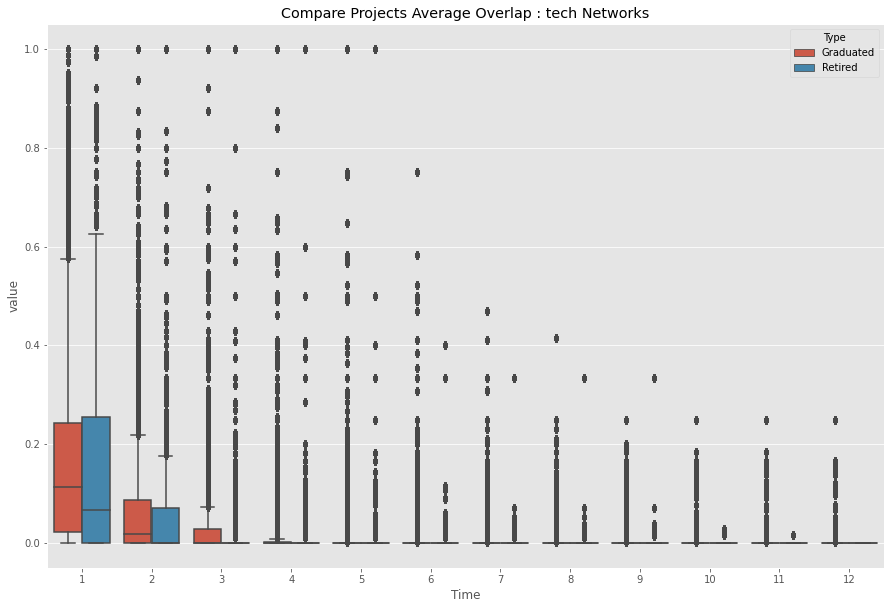

In [13]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

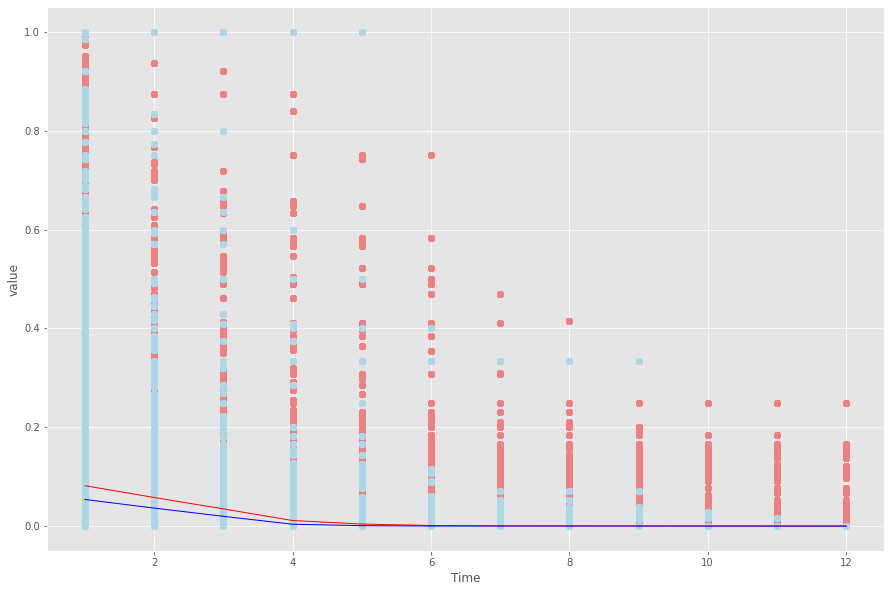

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})

In [15]:
dd

,Time,Type,value
0,1,Graduated,0.216867
1,1,Graduated,0.216867
2,1,Graduated,0.216867
3,1,Graduated,0.216867
4,1,Graduated,0.216867
...,...,...,...
97949333,12,Retired,0.0
97949334,12,Retired,0.0
97949335,12,Retired,0.0
97949336,12,Retired,0.0


In [16]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

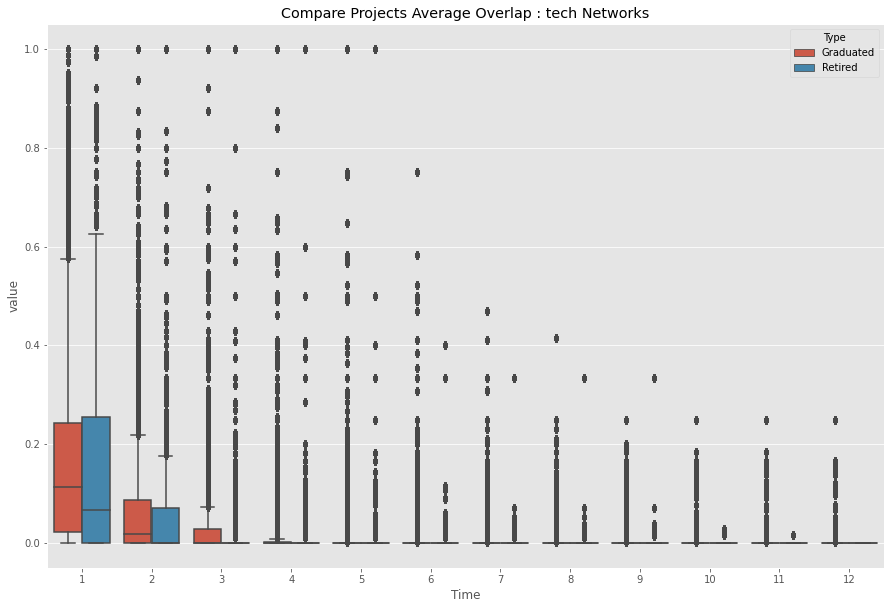

In [17]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

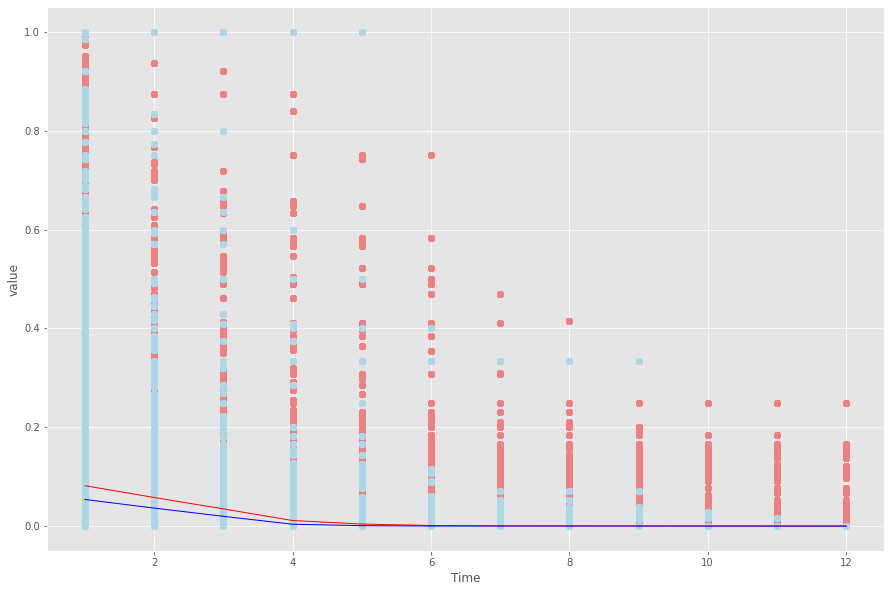

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})